In [10]:
library("geosphere")
library("ggplot2")

In [11]:
nodes <- read.csv("ITA_nodes.csv")
edges <- read.csv("ITA_edges.csv")

distancies <- matrix(0, nrow = nrow(nodes), ncol = nrow(nodes))

for (i in 1:nrow(nodes)) {
  for (j in 1:nrow(nodes)) {
    distancies[i, j] <- distHaversine(c(nodes$lon[i], nodes$lat[i]), c(nodes$lon[j], nodes$lat[j]))
  }
}

In [12]:
flows <- matrix(0, nrow = nrow(nodes), ncol = nrow(nodes))

for (i in 1:nrow(nodes)) {
  for (j in 1:nrow(nodes)) {
    # Subset edges data frame to get estimated flow from node i to node j
    matched_edges <- edges$estimated_flow[edges$from == i & edges$to == j]
    
    # Check if there are any matches
    if (length(matched_edges) > 0) {
      # If matches found, assign the first value to flows[i, j]
      flows[i, j] <- matched_edges[1]
    } else {
      flows[i, j] <- 0
    }
  }
}
flows

2218505.86,6277.14,1773.38,16415.08,7116.42,1949.18,3943.90,34.16,146.94,305.16,⋯,0,0,99.60,0,0,0,0,215.38,0,0
9238.94,136617.76,9628.72,71.62,220.82,3615.74,82.68,0.00,16.10,45.38,⋯,0,0,120.80,0,0,0,0,77.26,0,0
1491.56,8696.96,320654.04,29.76,363.46,508.40,17.52,19.84,8.00,28.86,⋯,0,0,4526.60,0,0,0,0,585.46,0,0
26007.20,35.46,56.46,580066.12,3858.78,390.76,18.00,247.50,1729.02,229.92,⋯,0,0,6.00,0,0,0,0,12.00,0,0
18231.92,234.98,84.16,9229.00,176490.08,7472.30,27.38,17.62,115.74,222.82,⋯,0,0,10.00,0,0,0,0,10.00,0,0
3974.58,2691.50,636.54,459.34,5408.74,364341.74,15.42,25.98,826.84,10055.20,⋯,0,0,24.90,0,0,0,0,108.72,0,0
2071.72,36.42,16.20,10.00,8.00,90.36,130917.88,2.00,0.00,4.02,⋯,0,0,0.00,0,0,0,0,8.00,0,0
102.72,0.00,8.00,153.80,4.00,17.52,0.00,179121.90,2786.02,608.12,⋯,0,0,0.00,0,0,0,0,4.00,0,0
392.76,10.00,26.00,1638.62,72.36,583.02,0.00,2647.56,237285.68,11524.68,⋯,0,0,2.00,0,0,0,0,10.00,0,0
334.62,56.88,34.66,440.22,162.14,5466.70,10.28,220.62,6113.28,804170.54,⋯,0,0,2.00,0,0,0,0,54.76,0,0
24.22,8.00,5.16,18.58,0.00,10.00,0.00,14.32,26.16,3761.52,⋯,0,0,4.00,0,0,0,0,12.90,0,0


In [13]:
GravityModel <- function(i, j, alpha, beta, k, d0){
  num <- nodes$population[i]^alpha * nodes$population[j]^beta
  den <- exp(distancies[i, j]/d0)

  return (k * num / den)
}

GravityModel(1, 5, 0.5, 1, 0.005, 10000)

[1] 2219.575

In [14]:
# Define loss function
loss_function <- function(params) {
  loss <- 0
  
  for (i in 1:nrow(nodes)) {
    for (j in 1:ncol(nodes)) {
      predicted_flow <- GravityModel(i, j, alpha = params[1], beta = params[2], k = params[3], d0 = params[4])
      loss <- loss + (flows[i, j] - predicted_flow)^2
    }
  }
  
  return(loss)
}

# Initial guess for parameters
initial_params <- c(0.5, 0.5, 0.005, 10000)

# Minimize the loss function using optim
optimal_params <- optim(initial_params, loss_function)$par
optimal_params

[1] 5.875801e-02 9.942262e-01 4.529480e-01 1.099584e+04

In [26]:
real_flows <- matrix(0, nrow = nrow(nodes), ncol = nrow(nodes))

for (i in 1:nrow(nodes)) {
  for (j in 1:ncol(nodes)) {
    real_flows[i, j] <- GravityModel(i, j, alpha = optimal_params[1], beta = optimal_params[2], k = optimal_params[3], d0 = optimal_params[4])
  }
}

In [27]:
edges

from,to,length_km,estimated_flow
<int>,<int>,<dbl>,<dbl>
1,1,0.00000,2218505.86
2,1,73.74745,9238.94
3,1,99.03090,1491.56
4,1,75.08811,26007.20
5,1,66.01214,18231.92
6,1,102.80910,3974.58
7,1,65.22848,2071.72
8,1,136.28741,102.72
9,1,117.22095,392.76


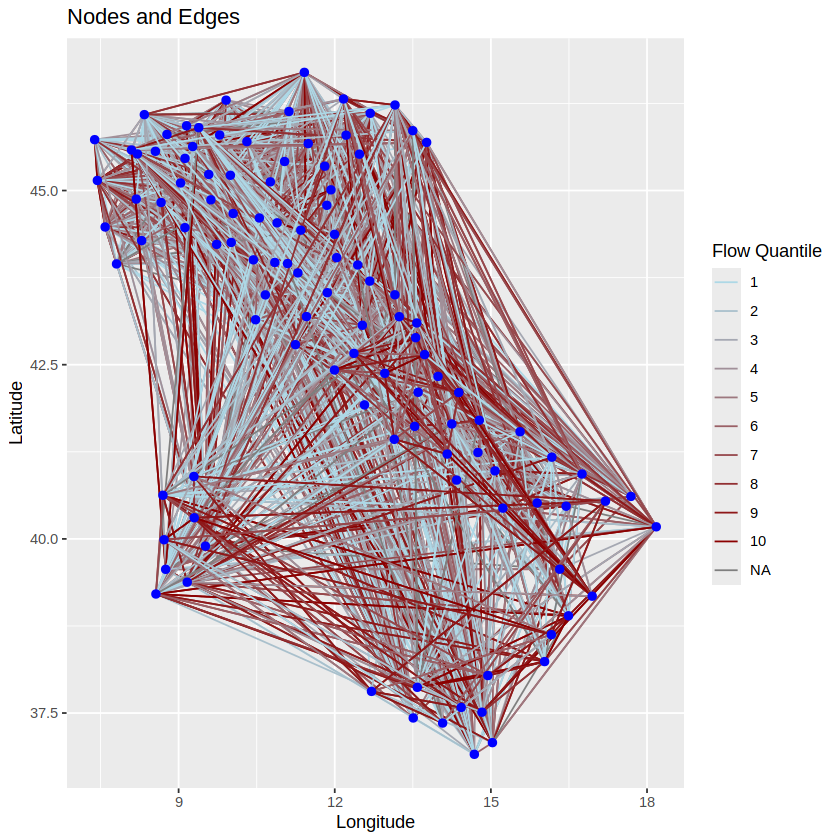

In [53]:
# Filter out negative or NA estimated_flow values
edges_filtered <- edges[edges$estimated_flow >= 0, ]

# Determine breaks for quantiles
breaks <- quantile(edges_filtered$estimated_flow, probs = seq(0, 1, length.out = 11))

# Define a function to generate the color palette
color_palette <- colorRampPalette(c("lightblue", "darkred"))

# Assign colors to quantiles
quantile_colors <- color_palette(10)

# Create a new column in edges_filtered for color groups
edges_filtered$color_group <- cut(edges_filtered$estimated_flow, breaks = breaks, labels = FALSE)

# Combine plots
combined_plot <- ggplot() +
  geom_segment(data = edges_filtered, aes(x = nodes$lon[from], y = nodes$lat[from],
                                          xend = nodes$lon[to], yend = nodes$lat[to], color = factor(color_group)), 
               size = 0.5) + 
  geom_point(data = nodes, aes(x = lon, y = lat), color = "blue", size = 2) +  # Plot nodes
  labs(x = "Longitude", y = "Latitude", title = "Nodes and Edges") +  # Set axis labels and title
  scale_color_manual(name = "Flow Quantile", values = quantile_colors) +  # Assign colors to quantiles
  guides(color = guide_legend(title = "Flow Quantile"))  # Set legend title

# Display combined plot
print(combined_plot)

In [19]:
RadiationModel <- function(i, j, alpha, beta, k, d0){
  num <- nodes$population[i]^alpha * nodes$population[j]^beta
  den <- exp(distancies[i, j]/d0)

  return (k * num / den)
}

RadiationModel(1, 5, 0.5, 1, 0.005, 10000)

[1] 2219.575